# Neural Networks

In [1]:
# MNIST 
# DataLoader, Transformations
# Multi-layer neural networks, activation functions
# Loss and optimizer
# Training loop w/ batch training
# Model evaluation
# GPU support

In [2]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

In [20]:
device = torch.device('cuda')

In [4]:
input_size = 784
hidden_size = 100
num_classes = 10
num_epochs = 2
batch_size = 100
learning_rate = 0.001

In [ ]:
train_dataset = torchvision.datasets.MNIST(root='./data', 
                train=True, transform=transforms.ToTensor(),
                download=True)
test_dataset = torchvision.datasets.MNIST(root='./data', 
                train=False, transform=transforms.ToTensor())

In [9]:
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                 batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                 batch_size=batch_size, shuffle=False)

In [10]:
examples = iter(train_loader)
samples, labels = examples.next()
print(samples.shape, labels.shape)

torch.Size([100, 1, 28, 28]) torch.Size([100])


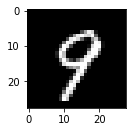

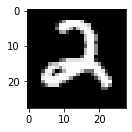

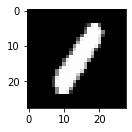

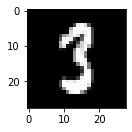

In [13]:
for i in range(4):
    plt.subplot(2, 2, i+1)
    plt.imshow(samples[i][0], cmap='gray')
    plt.show()

In [15]:
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__()
        self.l1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.l2 = nn.Linear(hidden_size, num_classes)
        
    def forward(self, x):
        out = self.l1(x)
        out = self.relu(out)
        out = self.l2(out)
        return out

In [23]:
model = NeuralNet(input_size, hidden_size, num_classes)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [25]:
total_steps = len(train_loader)

for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        images = images.reshape(-1, 28*28)
        
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # Backward pass
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        # Progress
        if (i+1)%100 == 0:
            print(f'epoch {epoch+1}/{num_epochs}, step {i+1}/{total_steps}, loss = {loss.item():.4f}')

epoch 1/2, step 100/600, loss = 0.2067
epoch 1/2, step 200/600, loss = 0.0982
epoch 1/2, step 300/600, loss = 0.0966
epoch 1/2, step 400/600, loss = 0.0909
epoch 1/2, step 500/600, loss = 0.1693
epoch 1/2, step 600/600, loss = 0.1416
epoch 2/2, step 100/600, loss = 0.0305
epoch 2/2, step 200/600, loss = 0.0948
epoch 2/2, step 300/600, loss = 0.2149
epoch 2/2, step 400/600, loss = 0.1760
epoch 2/2, step 500/600, loss = 0.1092
epoch 2/2, step 600/600, loss = 0.1218


In [29]:
# Evaluation
with torch.no_grad():
    n_correct = 0
    n_samples = 0
    for images, labels in test_loader:
        images = images.reshape(-1, 28*28)
        outputs = model(images)
        
        # value, index of network pred output tensors
        _, preds = torch.max(outputs, 1)
        n_samples += labels.shape[0]
        n_correct += (preds == labels).sum().item()
        
    acc = 100.0 * n_correct / n_samples
    print(n_correct)
    print(n_samples)
    print(f'accuracy = {acc}')

58518
60000
accuracy = 97.53


# Convolutional Neural Networks

In [30]:
num_epochs = 4
batch_size = 4
learning_rate = 0.001

In [ ]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))]
)

In [31]:
train_dataset = torchvision.datasets.CIFAR10(root='./data', 
                train=True, transform=transforms.ToTensor(),
                download=True)
test_dataset = torchvision.datasets.CIFAR10(root='./data', 
                train=False, transform=transforms.ToTensor())

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./data/cifar-10-python.tar.gz to ./data


In [32]:
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                 batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                 batch_size=batch_size, shuffle=False)

In [33]:
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

In [67]:
example = iter(train_loader)
images, labels = example.next()
print(f'{images.shape}')
print(f'{labels.shape}')

torch.Size([4, 3, 32, 32])
torch.Size([4])


In [68]:
def imshow(img):
    img = img / 2 + 0.5  # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

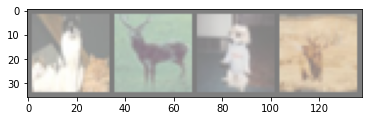

In [69]:
imshow(torchvision.utils.make_grid(images))

In [ ]:
conv1 = nn.Conv2d(3, 6, 5)
pool = nn.MaxPool2d(2, 2)
conv2 = nn.Conv2d(6, 15, 5)
print(f'Initial shape: {images.shape}')

x = conv1(images)
print(f'Shape after conv1: {x.shape}')
x = pool(images)
print(f'Shape after conv1: {x.shape}')

In [50]:
import torch.nn.functional as F

class ConvNet(nn.Module):
    def __init__(self):
        super(ConvNet, self).__init__()
        # input channel size, output channel size, kernel size
        self.conv1 = nn.Conv2d(3, 6, 5)
        # kernel size, stride length
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        # Dimensions after convolutions, pooling, and flattening
        self.fc1 = nn.Linear(16*5*5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
    
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16*5*5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [51]:
model = ConvNet()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [52]:
total_steps = len(train_loader)

In [53]:
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (i+1)%2000 == 0:
            print(f'epoch {epoch+1}/{num_epochs}, step {i+1}/{total_steps}, loss = {loss.item():.4f}')
print('Finished training.')

epoch 1/4, step 2000/12500, loss = 2.3193
epoch 1/4, step 4000/12500, loss = 2.3237
epoch 1/4, step 6000/12500, loss = 2.3101
epoch 1/4, step 8000/12500, loss = 2.2921
epoch 1/4, step 10000/12500, loss = 2.3068
epoch 1/4, step 12000/12500, loss = 2.2998
epoch 2/4, step 2000/12500, loss = 2.2909
epoch 2/4, step 4000/12500, loss = 2.2334
epoch 2/4, step 6000/12500, loss = 2.1802
epoch 2/4, step 8000/12500, loss = 1.5367
epoch 2/4, step 10000/12500, loss = 1.4836
epoch 2/4, step 12000/12500, loss = 2.9232
epoch 3/4, step 2000/12500, loss = 1.9299
epoch 3/4, step 4000/12500, loss = 1.8964
epoch 3/4, step 6000/12500, loss = 1.9879
epoch 3/4, step 8000/12500, loss = 2.1019
epoch 3/4, step 10000/12500, loss = 1.6567
epoch 3/4, step 12000/12500, loss = 1.8982
epoch 4/4, step 2000/12500, loss = 1.3865
epoch 4/4, step 4000/12500, loss = 1.6485
epoch 4/4, step 6000/12500, loss = 1.4678
epoch 4/4, step 8000/12500, loss = 1.8963
epoch 4/4, step 10000/12500, loss = 1.2918
epoch 4/4, step 12000/12500

In [56]:
# Evaluation
with torch.no_grad():
    n_correct = 0
    n_samples = 0
    
    n_class_correct = [0 for i in range(10)]
    n_class_samples = [0 for i in range(10)]
    
    for images, labels in test_loader:
        outputs = model(images)
        
        # value, index of network pred output tensors
        _, preds = torch.max(outputs, 1)
        n_samples += labels.shape[0]
        n_correct += (preds == labels).sum().item()
        
        for i in range(batch_size):
            label = labels[i]
            pred = preds[i]
            if (label == pred):
                n_class_correct[label] += 1
            n_class_samples[label] += 1
        
    acc = 100.0 * n_correct / n_samples
    print(f'Network accuracy: {acc}') 
    
    for i in range(10):
        acc = 100* n_class_correct[i] / n_class_samples[i]
        print(f'Accuracy of {classes[i]}: {acc}%')

network accuracy = 39.13
Accuracy of plane: 47.62%
Accuracy of car: 83.78%
Accuracy of bird: 11.36%
Accuracy of cat: 13.18%
Accuracy of deer: 26.06%
Accuracy of dog: 29.36%
Accuracy of frog: 59.74%
Accuracy of horse: 55.42%
Accuracy of ship: 48.6%
Accuracy of truck: 16.18%
